In [1]:
#Red Wine

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

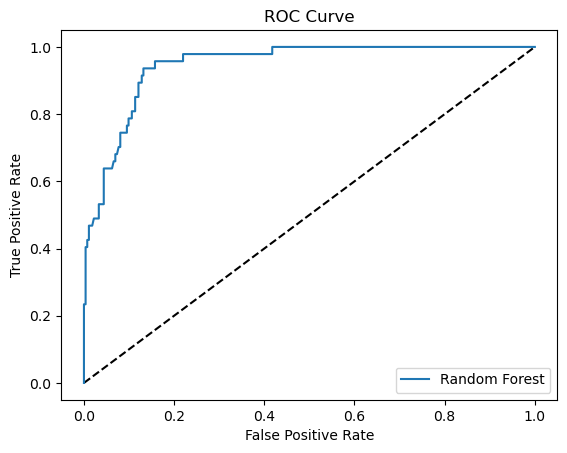

ROC AUC Score: 0.9455615306679136


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# Load the dataset
url = "https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Red%20Wine/winequality-red.csv"
data = pd.read_csv(url)

# Data exploration
print(data.head())
print(data.describe())
print(data.info())

# Data preprocessing
# Check for missing values
print(data.isnull().sum())

# Check for outliers and handle them if necessary

# Feature selection
# You can use correlation analysis or feature importance from models like RandomForestClassifier

# Data splitting
X = data.drop('quality', axis=1)
y = (data['quality'] >= 7).astype(int)  # Convert quality to binary: 1 for good, 0 for not good
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model selection - RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Model training
rf.fit(X_train_scaled, y_train)

# Model evaluation
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

# Final model with best parameters
best_rf = grid_search.best_estimator_
y_pred_prob = best_rf.predict_proba(X_test_scaled)[:, 1]

# ROC Curve analysis
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# AUC score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))
